# Data Analysis of Anime Dataset 

This project focuses on analysing an anime dataset using a series of analysis and visualisation tools. The dataset is procured from myanimelist.net and compiled in 2017. Each user on this website is able to add anime to their completed list and give it a rating, thus this dataset is a compilation of those ratings. The dataset was compiled for the purpose of recommendations for anime.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?resource=download&select=rating.csv). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Which TV anime is considered the most popular?
2. What genre of anime is considered the most popular? 
3. Is there a correlation between the number of members and the anime's rating?
4. Which anime broadcast types has the highest number of members?
5. What type of anime broadcast performs the best?

## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

## Load and Inspect Data

In [3]:
anime.info()
anime.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


There are two datasets that we will be looking at; 'anime.csv' and 'rating.csv'. The first dataset has 12294 rows and 7 columns  about which contains information on various animes. 

Here's a quick summary of the columns in 'anime.csv' dataset:
- **anime_id**: myanimelist.net's unique id identifying an anime.
- **name**: full name of anime.
- **genre**: comma separated list of genres for this anime.
- **type**: different formats of broadcast
- **episodes**: how many episodes in this show. (1 if movie).
- **rating**: average rating out of 10 for this anime.
- **members**: number of community members that are in this anime's "group".

## Data Preparation

In [4]:
# To add value labels on graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+100, y[i], ha = 'center')

## Data Cleaning

First, we will convert the data type of the anime_id column to an 'object'.

In [5]:
anime['anime_id'] = anime['anime_id'].astype(object)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  object 
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 672.5+ KB


In [6]:
anime.describe(include = 'all')

,anime_id,name,genre,type,episodes,rating,members
count,12294.0,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,12294.0,12292,3264,6,187,NaN,NaN
top,32281.0,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,1.0,2,823,3787,5677,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,NaN,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,NaN,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,NaN,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,NaN,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


The table provides information on each column of the dataset. The average anime rating is approximately 6.47 and the average number of members for an anime is approximately 18 thousand people. The highest number of members an anime has is more than a million members. There seems to be a duplicate anime called 'Shi Wan Ge Leng Xiaohua'. Let's look into it.

In [7]:
duplicates = anime[anime.name == 'Shi Wan Ge Leng Xiaohua']
duplicates

,anime_id,name,genre,type,episodes,rating,members
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


It seems that there is a ONA and movie version of this so it is not necessary to remove it.

### Genres of Anime

Next, we will explore the data to determine the number of categories for the genre and type columns.

In [8]:
genres = anime.genre.value_counts().reset_index()
genres

,genre,count
0,Hentai,823
1,Comedy,523
2,Music,301
3,Kids,199
4,"Comedy, Slice of Life",179
...,...,...
3259,"Adventure, Drama, Fantasy, Game, Sci-Fi",1
3260,"Adventure, Demons, Fantasy, Historical",1
3261,"Action, Comedy, Drama, Mecha, Music, Sci-Fi, S...",1
3262,"Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen",1


There are over 3000 rows of unique genres in this dataset. However, some animes have multiple genres. Hence, we will break down all of the individual genres. 

In [9]:
def remove_punctuation(list):
    genre_list = []
    for genre in list:
        if genre not in genre_list:
            if ', ' in genre:
                split_genre = genre.split(', ')
                for i in split_genre:
                    if i not in genre_list:
                        genre_list.append(i)
            else:
                genre_list.append(genre)
                
    return genre_list

all_genres = remove_punctuation(genres.genre)
print('There are', len(all_genres), 'unique genres present in this dataset. All genres are listed below:')
print(all_genres)

There are 43 unique genres present in this dataset. All genres are listed below:
['Hentai', 'Comedy', 'Music', 'Kids', 'Slice of Life', 'Dementia', 'Fantasy', 'Drama', 'Adventure', 'Action', 'Mecha', 'Sci-Fi', 'Parody', 'Historical', 'School', 'Sports', 'Shounen', 'Seinen', 'Mystery', 'Police', 'Ecchi', 'Romance', 'Magic', 'Supernatural', 'Horror', 'Military', 'Super Power', 'Shoujo', 'Space', 'Yuri', 'Harem', 'Psychological', 'Shounen Ai', 'Game', 'Samurai', 'Cars', 'Martial Arts', 'Demons', 'Yaoi', 'Josei', 'Thriller', 'Vampire', 'Shoujo Ai']


### Types of Anime Broadcast

In [10]:
print('Number of unique types:', anime.type.nunique())
print('Unique Types:', anime.type.unique())

Number of unique types: 6
Unique Types: ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


There are 6 different types of anime formats; TV, Original Video Animation (OVA), Movie, Special, Original Net Animation (ONA) and music. There are some null values in this column, hence we will try to replace these values.

### Handling Missing Data

In [11]:
anime_type_null = anime.genre.isnull().value_counts().reset_index()
anime_type_null

,genre,count
0,False,12232
1,True,62


There are 25 null values in the type column.

In [12]:
anime_type_null = anime[anime.type.isnull()]
anime_type_null.head()

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,NaN,8666


It seems that all of the rows with null type values also have null values in the rating column. The number of episodes are also unknown for these rows. 

Now, we will look for null values in the genre column.

In [13]:
anime_genre_null = anime.genre.isnull().value_counts().reset_index()
anime_genre_null

,genre,count
0,False,12232
1,True,62


There are 62 null values in this column.

In [14]:
anime_genre_null = anime[anime.genre.isnull()]
anime_genre_null.head(10)

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
7198,30862,Yubi wo Nusunda Onna,NaN,Movie,1,5.65,223
7335,28987,Kamakura,NaN,Movie,1,5.53,164
7349,19219,Modern No.2,NaN,Movie,1,5.52,374
7426,29629,Coffee Break,NaN,Movie,1,5.44,265
7498,28653,Maze,NaN,Movie,1,5.37,138


We will replace null values in the genre column with 'N/A' for easier analysis.

In [15]:
anime.genre.fillna(value = 'N/A', inplace = True)

In [16]:
anime_rating_null_count = anime.rating.isna().sum()
print('There are',anime_rating_null_count, 'null values.')

There are 230 null values.


In [17]:
anime_rating_null = anime[anime.rating.isnull()]
anime_rating_null.head(10)

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999
10899,25777,Shingeki no Kyojin Season 2,"Action, Drama, Fantasy, Shounen, Super Power",TV,Unknown,NaN,170054
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,NaN,22748
10901,33486,Boku no Hero Academia 2nd Season,"Action, Comedy, School, Shounen, Super Power",TV,Unknown,NaN,46892
10902,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,"Adventure, Comedy, Fantasy, Magic, Supernatural",TV,Unknown,NaN,54069
10903,33506,Ao no Exorcist: Kyoto Fujouou-hen,"Action, Demons, Fantasy, Shounen, Supernatural",TV,Unknown,NaN,45127


Rows with null rating values seem to correlate with unknown number of episodes. This could mean that these animes might still be incomplete or currently airing at the time.

## Data Question 1: Which TV anime is considered the most popular?

The popularity of an anime is subjective as there are various factors to consider and every individual has their own rating on an anime. Hence, we will generalise it and focus on ratings and the number of members only. In addition to that, we will only consider TV and OVA animes for this analysis.

In [18]:
# Finding top animes with most members
anime_TV_OVA = anime[(anime.type == 'TV') | (anime.type == 'OVA')]
anime_members = anime_TV_OVA.groupby('name').members.max().sort_values(ascending = False).reset_index()
anime_members.head(10)

,name,members
0,Death Note,1013917
1,Shingeki no Kyojin,896229
2,Sword Art Online,893100
3,Fullmetal Alchemist: Brotherhood,793665
4,Angel Beats!,717796
5,Code Geass: Hangyaku no Lelouch,715151
6,Naruto,683297
7,Steins;Gate,673572
8,Mirai Nikki (TV),657190
9,Toradora!,633817


Death Note has the highest number of members with over 1 million members, followed by Shineki no Kyojin (Attack On Titan) and Sword Art Online.

In [19]:
# Finding top rated animes
popular_anime = anime[(anime.members > 500000) & ((anime.type == 'TV') | (anime.type == 'OVA'))]
popular_anime_rating = popular_anime.groupby('name').rating.max().sort_values(ascending = False).reset_index()
popular_anime_rating.head(10)

,name,rating
0,Fullmetal Alchemist: Brotherhood,9.26
1,Steins;Gate,9.17
2,Code Geass: Hangyaku no Lelouch R2,8.98
3,Code Geass: Hangyaku no Lelouch,8.83
4,One Punch Man,8.82
5,Tengen Toppa Gurren Lagann,8.78
6,Death Note,8.71
7,One Piece,8.58
8,Shingeki no Kyojin,8.54
9,Psycho-Pass,8.50


Some animes have high ratings but with very low number of members. Hence, we will only consider animes with at least 500000 members.

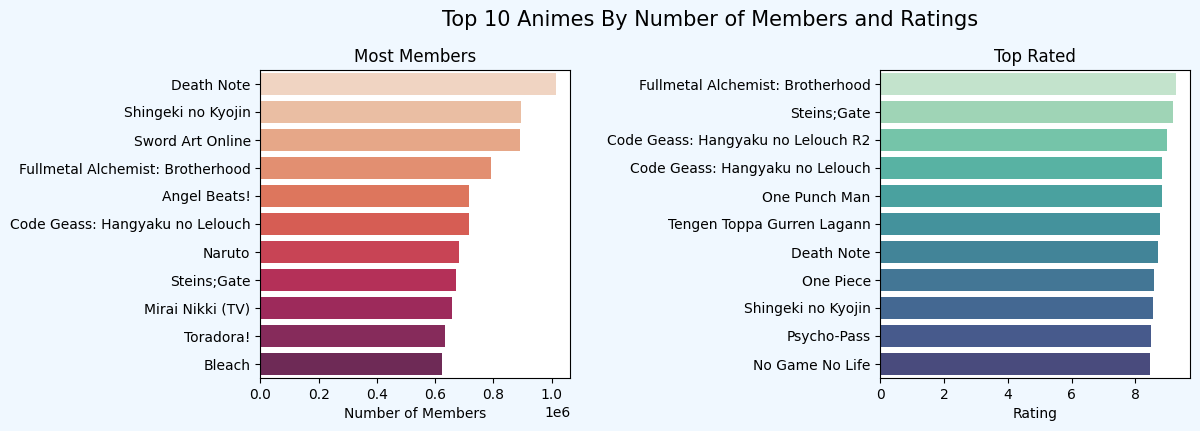

In [54]:
# PLotting bar charts for top rated animes with most members
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 4))
fig.suptitle("Top 10 Animes By Number of Members and Ratings", fontsize = 15, y = 1.03)
plt.subplots_adjust(wspace = 1,hspace = 2)

plt.subplot(1,2,1)
sns.barplot(y = anime_members.name[0:11], x = anime_members.members[0:11], palette= sns.color_palette("rocket_r", 15))
plt.ylabel('')
plt.xlabel('Number of Members')
plt.title('Most Members')
# plt.xticks(rotation = -90)
# plt.ylim(400000,1100000)

plt.subplot(1,2,2)
sns.barplot(y = popular_anime_rating.name[0:11], x = popular_anime_rating.rating[0:11], palette = sns.color_palette("mako_r", 15))
plt.ylabel('')
plt.xlabel('Rating')
plt.title('Top Rated')
# plt.xticks(rotation = -90)
# plt.ylim(7,10)
plt.show()

The following animes are in the top 10 highest ratings and most members: Fullmetal Alchemist: Brotherhood, Death Note, Steins Gate, Shingeki no Kyojin and Code Geass. These 5 animes can be considered as one of the most popular animes of all time. However, it is important to remember that some of these animes were released years ago and may not have aged well compared to recent anime.

## Data Question 2: What genre of anime is considered the most popular? 

In [21]:
# Count for each genre of anime
genre_dict = {}

for i in all_genres:
    anime_genre = anime[anime.genre.str.contains(i)]
    genre_dict[i] = len(anime_genre)
     
# sorting the genre list
keys = list(genre_dict.keys())
vals = list(genre_dict.values())
sorted_value_index = np.argsort(vals)
sorted_dict = {keys[i]: vals[i] for i in sorted_value_index}

genre_keys = list(sorted_dict.keys())
genre_vals = list(sorted_dict.values())

average_rating_list = []

for i in genre_keys[-10:]:
    anime_rating = anime[anime.genre.str.contains(i)]
    average_rating_list.append(anime_rating.rating.mean())

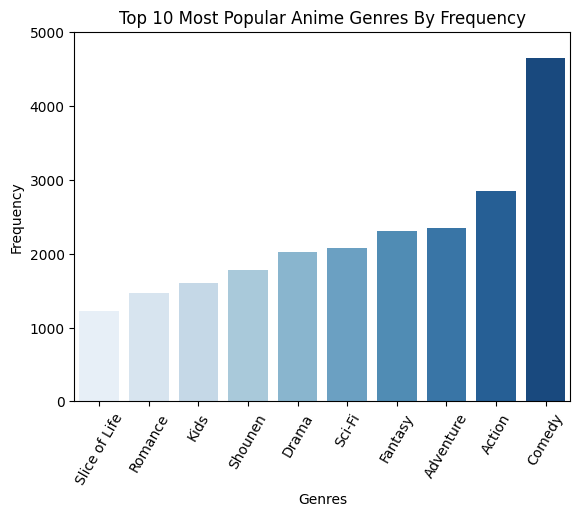

In [55]:
# Plotting bar chart for most produced genres
sns.barplot(x = genre_keys[-10:], y = genre_vals[-10:], palette = sns.color_palette("Blues", 10))
plt.xticks(rotation = 60)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Anime Genres By Frequency')
plt.ylim(0,5000)
plt.show()

Comedy is the most popular genre in terms of frequency with around 4700 animes produced, followed by action and adventure animes. 

In [23]:
genre_dict_rating = {}
genre_dict_members = {}

for i in all_genres:
    anime_rating = anime[(anime.genre.str.contains(i))]
    genre_dict_rating[i] = anime_rating.rating.mean()
     
# sorting the genre list
keys = list(genre_dict_rating.keys())
vals = list(genre_dict_rating.values())
sorted_value_index = np.argsort(vals)
sorted_dict = {keys[i]: vals[i] for i in sorted_value_index}

genre_rating_keys = list(sorted_dict.keys())
genre_rating_vals = list(sorted_dict.values())

for i in all_genres:
    anime_rating = anime[(anime.genre.str.contains(i))]
    genre_dict_members[i] = anime_rating.members.mean()
     
# sorting the genre list
keys = list(genre_dict_members.keys())
vals = list(genre_dict_members.values())
sorted_value_index = np.argsort(vals)
sorted_dict = {keys[i]: vals[i] for i in sorted_value_index}

genre_members_keys = list(sorted_dict.keys())
genre_members_vals = list(sorted_dict.values())

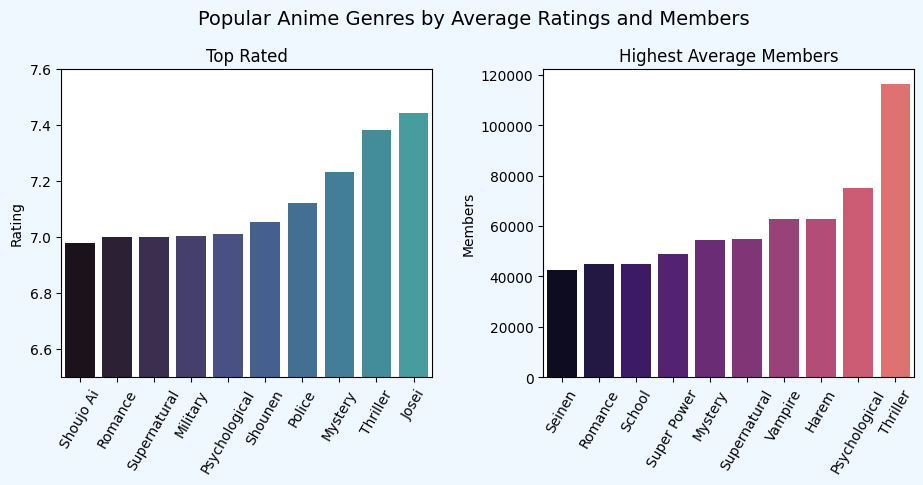

In [58]:
# Plotting bar chart for top animes by average ratings
fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 4))
fig.suptitle("Popular Anime Genres by Average Ratings and Members", fontsize = 14, y = 1.03)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.subplot(1,2,1)
sns.barplot(x = genre_rating_keys[-10:], y = genre_rating_vals[-10:], palette = sns.color_palette("mako", 14))
plt.title('Top Rated')
plt.ylabel('Rating')
plt.xlabel('')
plt.ylim(6.5,7.6)
plt.xticks(rotation = 60)

plt.subplot(1,2,2)
sns.barplot(x = genre_members_keys[-10:], y = genre_members_vals[-10:], palette = sns.color_palette("magma",14))
plt.title('Highest Average Members')
plt.ylabel('Members')
plt.xlabel('')
plt.xticks(rotation = 60)

plt.show()

Josei animes (animes directed towards females) have the highest rating of 7.4. Thriller anime could be considered the most popular genre of anime as it is the second highest rated genre and has the highest average number of members. However, it is important to note that ratings may not be an accurate representation of popularity as some genres only have a small amount of show produced, which can skew the genre's ratings.

## Data Question 3: Is there a correlation between the number of members and the anime's rating?

In [25]:
# Dataframe for animes with no null values in rating and members column
anime_rating_members = anime[(anime.rating.notnull()) & (anime.members.notnull())]
anime_rating_members.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [26]:
# Initial type count
all_types = anime.type.value_counts().rename_axis('Type').reset_index(name = 'Count')
all_types

,Type,Count
0,TV,3787
1,OVA,3311
2,Movie,2348
3,Special,1676
4,ONA,659
5,Music,488


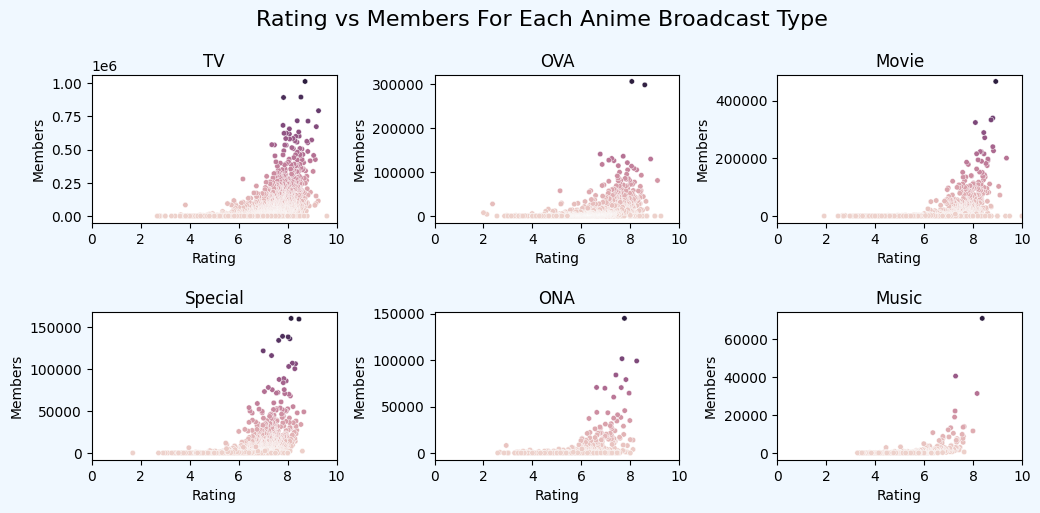

In [27]:
# Plotting rating vs members for each anime type
rating_list = []
members_list = []
subplot_count = 1

fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 5))
fig.suptitle("Rating vs Members For Each Anime Broadcast Type", fontsize = 16, y = 1.01)

for types in all_types.Type[0:6]:
    for i in range(0, len(anime)):
        if anime.type[i] == types:
            members_list.append(anime.members[i])
            rating_list.append(anime.rating[i])
    
    plt.subplot(2,3,subplot_count)
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    sns.scatterplot(x = rating_list, y = members_list, color = 'red', alpha = 1, s = 15, hue = members_list)
    plt.legend().set_visible(False)
    plt.title(types)
    plt.xlabel('Rating')
    plt.ylabel('Members')
    plt.xlim(0,10)
    rating_list = []
    members_list = []
    subplot_count += 1
    
plt.show() 

From the scatterplots shown above, all anime has a rating ranging between 2 to 10. It can be also be seen that there is a positive trend between ratings and members. As the ratings of an anime increases, the number of members increases as well. However, the increase only begins around 5 to 6 rating and it is varies in growth. There are still many animes that have a low number of members despite a higher rating. Anime with a rating lower than 5 have very little number of members. Around a rating of 8 or 9, the number of members for each anime type peaks.

In [28]:
# Finding pearson's correlation coefficient 
var,p = pearsonr(anime_rating_members.members, anime_rating_members.rating)
print('The Pearson Correlation Coefficient is {pearson}. This indicates the correlation between rating and members is positive and has a \nmoderate strength.'.format(pearson = round(var,3)))

The Pearson Correlation Coefficient is 0.388. This indicates the correlation between rating and members is positive and has a 
moderate strength.


## Data Question 4: Which anime broadcast types has the highest number of members?

In [29]:
# Members count for each anime type 
type_sum = anime.groupby('type').members.sum().rename_axis('Type').reset_index(name = 'Members')
type_sum

,Type,Members
0,Movie,24326080
1,Music,640178
2,ONA,2711146
3,OVA,19820109
4,Special,12865078
5,TV,161643014


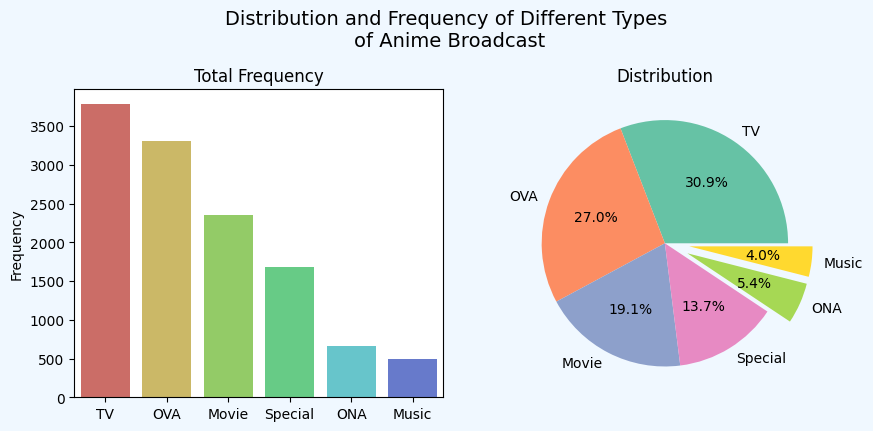

In [61]:
fig = plt.figure(facecolor = 'aliceblue', figsize = (10, 4))
fig.suptitle("Distribution and Frequency of Different Types \nof Anime Broadcast", fontsize = 14, y = 1.08)
plt.subplots_adjust(wspace=0.1, hspace=0.6)

plt.subplot(1,2,1)
sns.barplot(data = all_types, x = 'Type', y = 'Count', ci = None, palette = sns.color_palette("hls", 8))
plt.title('Total Frequency', fontsize = 12)
plt.xlabel('')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.pie(x = all_types.Count, labels = all_types.Type, colors = sns.color_palette("Set2"), autopct = '%1.1f%%',
    explode = (0,0,0,0,0.2,0.2))
plt.title('Distribution', fontsize = 12)
plt.show()

TV animes are the most popular media broadcast in terms of frequency, approximately 31% of animes are broadcasted on TV. OVAs (Original Video Animation) are the second most popular followed by movie animes. 

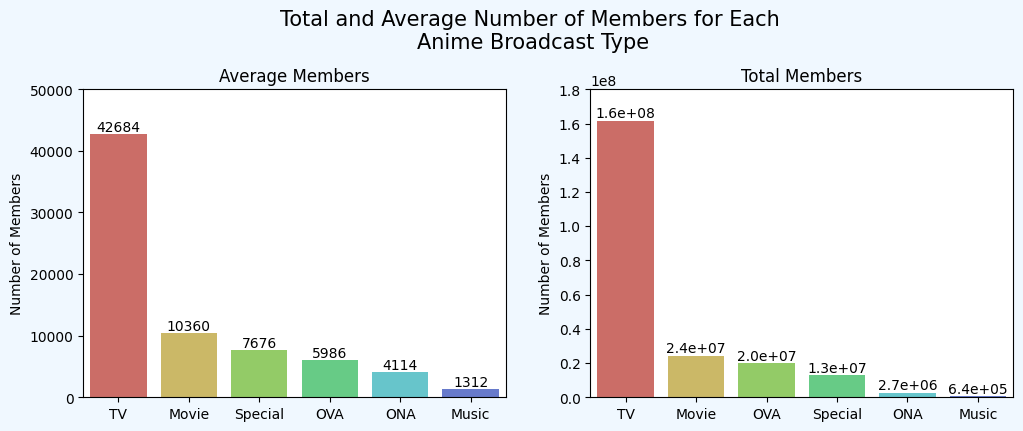

In [81]:
fig = plt.figure(facecolor = 'aliceblue', figsize = (12, 4))
fig.suptitle("Total and Average Number of Members for Each \nAnime Broadcast Type", fontsize = 15, y = 1.08)

plt.subplot(1,2,1)
ax = sns.barplot(data = anime, x = 'type', y = 'members', ci = None, palette = sns.color_palette("hls", 8), order = ['TV', 'Movie', 'Special', 'OVA', 'ONA', 'Music'])
ax.bar_label(ax.containers[0], fmt = '%1.0f')
plt.xlabel('')
plt.ylabel('Number of Members')
plt.title('Average Members')
plt.ylim(0, 50000)

plt.subplot(1,2,2)
ax1 = sns.barplot(x = type_sum.Type, y = type_sum.Members, order = ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music'], palette = sns.color_palette("hls", 8))
ax1.bar_label(ax1.containers[0], fmt = '%1.1e')
plt.xlabel('')
plt.ylabel('Number of Members')
plt.title('Total Members')
plt.ylim(0, 1.8e8)
plt.show()


Unsurprisingly, TV animes have the highest total and average number of members by a large margin. Even though, there is a higher number of OVAs, movie animes have the second highest total and average number of members.

## Data Question 5: What type of anime broadcast performs the best?

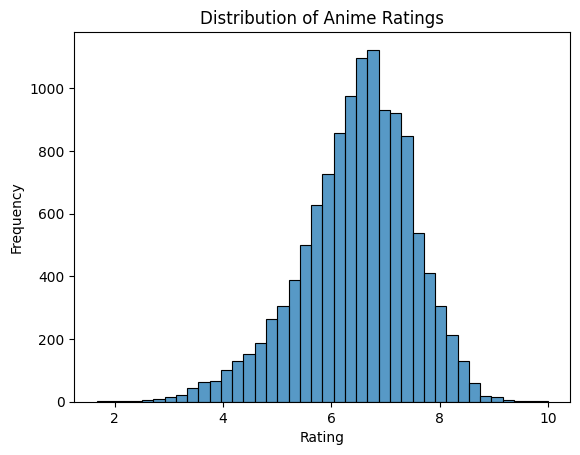

In [32]:
sns.histplot(data = anime_rating_members, x = 'rating', bins = 40)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Ratings')
plt.show()

The histogram above displays a unimodal distribution which ranges a rating from approximately 1 to 10. The frequency starts to increase exponentially around 3 rating and peaks around 6.4 then decrease down to 9 rating. Most animes seem to have a rating ranging from 6 to 8.

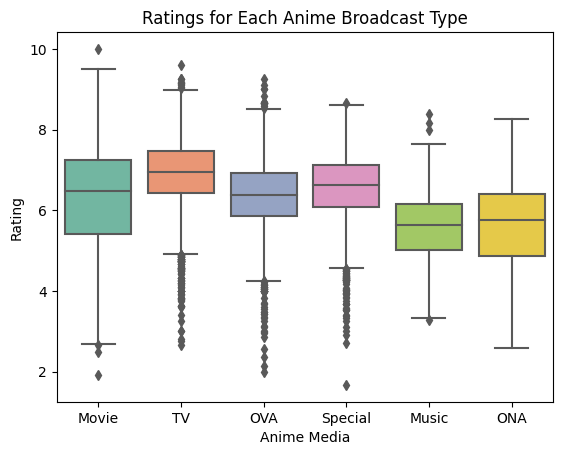

In [33]:
ax = sns.boxplot(data = anime_rating_members, x = 'type', y = 'rating', palette = sns.color_palette("Set2"))
# ax.bar_label(ax.containers[0])
plt.xlabel('Anime Media')
plt.ylabel('Rating')
plt.title('Ratings for Each Anime Broadcast Type')
# plt.ylim(5,7.2)
plt.show()

According to the boxplot above, TV anime has the the highest average anime. However, it has many outliers which have to be taken into consideration. Movie anime have the largest range in ratings, ranging from 2.8 to 9.7 and music anime has the smallest distribution. OVAs and specials have outliers below the minimum rating.

## Conclusion

The analysis of this dataset was to gain an insight into different varieties of anime and identify any trends or patterns in the industry. One of the objectives of this analysis was to determine the most popular anime. Using ratings and the number of members as an indicator of popularity, it was found that Fullmetal Alchemist: Brotherhood, Death Note, Steins Gate, Shingeki no Kyojin and Code Geass could be considered the most popular animes. Another finding was that the genre that was most produced was comedy. However, the most rated genre was Josei and the genre with the highest average members was thriller. Other than that, it was observed that there was a positive correlation between ratings and the number of members. Lastly, TV animes were also determined to be the most popular type of anime. 

Anime is becoming more popular in recent years and for newcomers, the amount of anime out there may be daunting. Therefore, I hope this analysis helps to gain an understanding of anime and attracts people to watch it. 